<a href="https://colab.research.google.com/github/michelucci/oreilly-london-ai/blob/master/day1/Polynomial_fitting_with_eager_execution_TF2_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial fitting with eager execution with TF2.X

(C) 2019 Umberto Michelucci

umberto.michelucci@toelt.ai

www.toelt.ai

Idea inspired by https://goo.gl/m9y1C4

In [1]:
!pip install tensorflow==2.0.0

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

from google.colab import files

Now we need to generate some data 

In [0]:
x = np.arange(0, 5, 0.1)
y = x**3 - 4*x**2 - 2*x + 2

expected_w = [1,-4,-2,2]
y_noise = y + np.random.normal(0, 1.5, size=(len(x),))

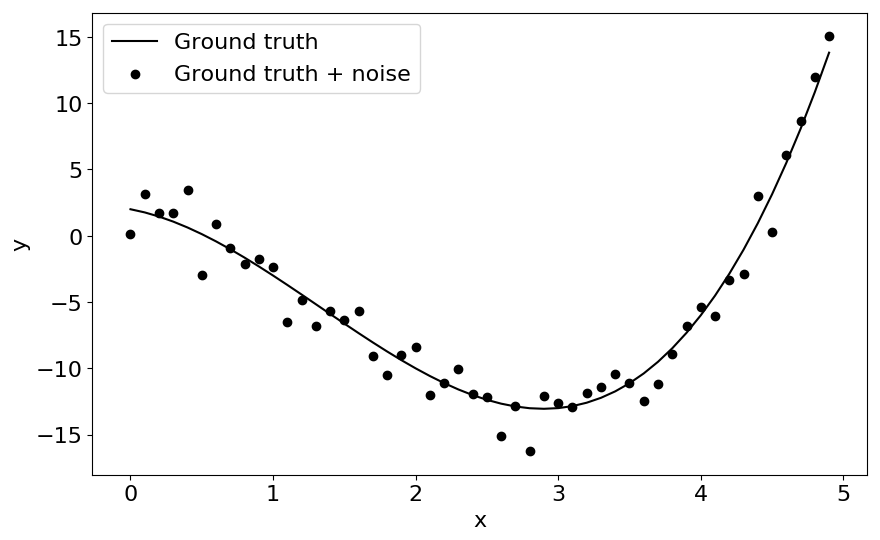

In [3]:
fig = plt.figure (figsize = (10,6))
plt.plot(x,y, label = "Ground truth", color = 'black')
plt.scatter(x, y_noise, label = "Ground truth + noise", color = 'black')
plt.legend(fontsize = 16, loc = 'upper left')
plt.xlabel ('x', fontsize = 16)
plt.ylabel ('y', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=16)

and let's define the loss function (remember we are doing regression)

In [0]:
w = tf.Variable(tf.random.normal([4], dtype = tf.float64), trainable = True, dtype = tf.float64) # The 4 parameters

@tf.function
def f(x):
  y = w[0] * x ** 3 + w[1] * x ** 2 + w[2] * x + w[3]
  return y

In [0]:
@tf.function
def loss(x):
    err = f(x) - y_noise
    return tf.reduce_mean(tf.square(err))

In [10]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1)

print("Starting values of w ", w, w[0])
trainable_variables = [w]
for i in range(10000):
  with tf.GradientTape() as t:
    # no need to watch a variable
    # trainable variables are always watched
    func = f(x)
    loss_value = loss(x)

  gradients = t.gradient(loss_value, trainable_variables)
  optimizer.apply_gradients(zip(gradients, trainable_variables))

print(w)
print(expected_w)


Starting values of w  <tf.Variable 'Variable:0' shape=(4,) dtype=float64, numpy=array([ 1.04747176, -4.26139045, -1.75714446,  1.96012836])> tf.Tensor(1.0474717616804745, shape=(), dtype=float64)
<tf.Variable 'Variable:0' shape=(4,) dtype=float64, numpy=array([ 1.04753449, -4.2613448 , -1.75705187,  1.96017476])>
[1, -4, -2, 2]


Let's plot the loss function now

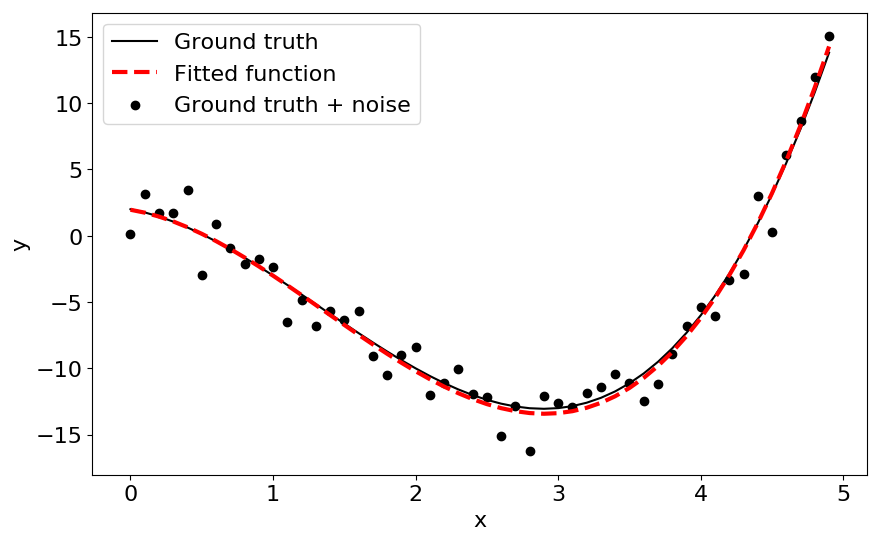

In [12]:
fig = plt.figure (figsize = (10,6))
plt.plot(x,y, label = "Ground truth", color = 'black')
plt.scatter(x, y_noise, label = "Ground truth + noise", color = 'black')
plt.plot(x, f(x).numpy(), color = 'red', ls = '--', lw = 3, 
         label = 'Fitted function')
plt.legend(fontsize = 16, loc = 'upper left')
plt.xlabel ('x', fontsize = 16)
plt.ylabel ('y', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=16)
